In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
plt.style.use("dark_background")

***5.1 Неравенство Чебышева***

***Теорема:*** Если СВ $\xi$ имеет МО $E_\xi=a$ и дисперсию $D_\xi$, то для любого $\varepsilon > 0$ справедливо неравенство Чебышева
$$P(|\xi-E_\xi| \geq \varepsilon) \leq \frac{D_\xi}{\varepsilon^2} \Leftrightarrow
     P(|\xi-E_\xi| < \varepsilon) \geq 1 - \frac{D_\xi}{\varepsilon^2}$$

***Теорема Маркова (Неравенство Маркова)*** Для любой неотрицательно СВ $\xi$, имеющей МО $E_\xi$ и $\varepsilon>0$, справедливо неравенство:
$$P\{\xi \geq \varepsilon \} \leq \frac{E_\xi}{\varepsilon}$$



***Пример***

Оценить с помощью неравенства Чебышева вероятность того, что отклонение СВ $\xi$ от своего матожидания будет меньше трех среднекватратических отклонений $\sigma_\xi$

$P\{|\xi-E_\xi| < \varepsilon \} \geq 1 - \frac{D_\xi}{\varepsilon^2} \Rightarrow
P\{|\xi-E_\xi| 3\sigma \} \geq 1 - \frac{\sigma^2}{9\sigma^2}=\frac{8}{9} \approx 0.8889
$

***5.2 Теорема Чебышева***
Если случайные величины $\xi_1, \xi_2, ...,\xi_n,...$ независимы и существует такое число $C>0$, что $D_{\xi_i} \leq C, \; \forall i=1, 2, ..., \forall \varepsilon>0$
$$\lim\limits P\bigg\{ \bigg| \frac{1}{n}\sum\limits_{i=1}^{n}\xi_i
    -\frac{1}{n}\sum\limits_{i=1}^{n}E_{\xi_i} \bigg| < \varepsilon \bigg\}=1,$$
т.е. среднее арифметическое этих случайных величин схдодится по вероятности к среднему арифметическому их МО:
$$\frac{1}{n}\sum\limits_{i=1}^{n}\xi_i \xrightarrow[n \to \infty]{P}
    \frac{1}{n}\sum\limits_{i=1}^{n}E_{\xi_i}$$

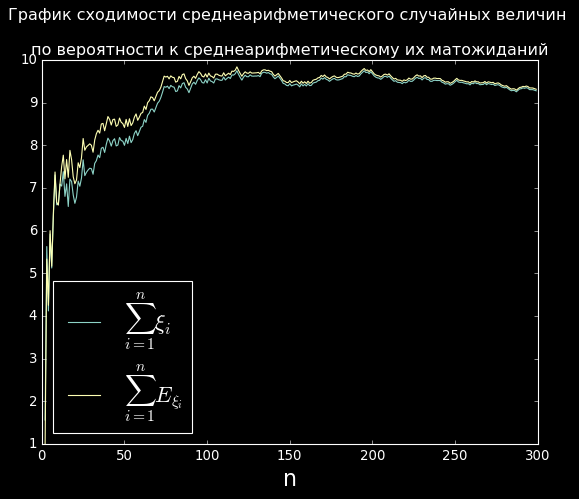

In [162]:
mus, mean_mus, means, mean_means = [], [], [], []
n = 300
nn = list(range(2, n))
for n in nn:
    mu = np.random.randint(20)
    sigma = np.random.randint(1, 10)
    choice = sts.norm(loc=mu, scale=sigma).rvs(n) # sample of size n
    mus.append(mu)
    mean_mus.append(sum(mus)/n)
    means.append(choice.mean())
    mean_means.append(sum(means)/n)

plt.plot(nn, mean_means, label=r'$\sum_{i=1}^n\xi_i$')
plt.plot(nn, mean_mus, label=r'$\sum_{i=1}^n E_{\xi_i}$')
plt.xlabel('n', fontsize=20)
plt.legend(loc='best', prop={'size': 20})
title = '''График сходимости среднеарифметического случайных величин \n
по вероятности к среднеарифметическому их матожиданий'''
plt.title(title)
plt.show()

*Следствие.* Если св $\xi_1, \xi_2,...,\xi_n,...$ независимы и одинаково распределены, $E_\xi=a, \; D_\xi=\sigma$, то $\forall \varepsilon > 0$
$$\lim\limits_{n\to\infty} P\bigg\{ \bigg| \frac{1}{n}\sum\limits_{i=1}^{n}\xi_i
    - a \bigg| < \varepsilon \bigg\}=1,$$
т.е. среднеарифметическое СВ сходится по вероятности к математическому ожиданию $a$:
$$\frac{1}{n}\sum\limits_{i=1}^{n}\xi_i \xrightarrow[n \to \infty]{P} a$$

Теорема Чебывшева подтверждает связь между случайностью и необходимостью: среднее занчение *случайной величины*
$$\overline{\xi}=\frac{1}{n}\sum\limits_{i=1}^{n}\xi_i$$
практически не отличается от *неслучайной величины* 
$$\frac{1}{n}\sum\limits_{i=1}^{n}E_{\xi_i}$$

***Пример.*** Глубина моря измеряется прибором, не имеющим систематической ошибки. Среднее квадратическое отклонение измерений не превосходит 15м. Сколько нужно сделать независимых измерений, чтобы с вероятностью, не меньшей 0.9, можно было утверждать, что среднее арифметическое этих измерений отличается от $a$ (глубина моря) по модулю меньше, чем на 5м?

$
P\bigg\{ \bigg| \frac{1}{n}\sum\limits_{i=1}^{n}\xi_i
    -\frac{1}{n}\sum\limits_{i=1}^{n}E_{\xi_i} \bigg| < \varepsilon \bigg\} \geq 
    1 -\frac{C}{n\varepsilon^2} \Rightarrow
P\bigg\{ \bigg| \frac{1}{n}\sum\limits_{i=1}^{n}\xi_i -a \bigg| < 5 \bigg\} \geq 
1 - \frac{225}{25\varepsilon^2} \geq 0.9 \Rightarrow n \geq 90
$

Измерение необходимо проводить не менее 90 раз.

***5.3 Теорема Бернулли***

Если вероятность появления события $A$ в одном испытании равна $p$, число наступления этого события при $n$ независимых испытаниях равна $n_A$, то для любого числа $\varepsilon>0$ имеет место равнество
$$\lim\limits_{n\to\infty}P\bigg\{\bigg| \frac{n_A}{n} - p \bigg|<\varepsilon \bigg\}=1,$$
т.е. относительная частота $P^*(A)$ события $A$ сходится по вероятности к вероятности $p$ события $A: \; P^*(A) \xrightarrow[n\to\infty]{P}P(A)$. 

Пусть СВ $\xi_1, \xi_2,...,\xi_n,...: \; \forall i=\overline{1, \infty}\;
\xi_{i}=\begin{cases}
    1 \text{, если } A\\
    0 \text{, если } \overline{A}\\
\end{cases}, \Rightarrow 
    n_A = \sum\limits_{i=1}^{n}\xi_i, E_\xi=p, D_\xi=pq
$
 
Закон распределения имеет вид:
$$
\begin{array}{|c|c|с|}
    \hline \xi_i     & 0   & 1   \\
    \hline P(\xi_i)  & 1-p & p   \\
    \hline
\end{array}, \forall i \notag
$$

$ \Rightarrow \forall i \; D_{\xi_i} \leq \frac{1}{4}$, применяя т. Чебышева имеем $\Rightarrow \lim\limits_{n\to\infty}P\bigg\{\bigg| \frac{n_A}{n} - p \bigg| <\varepsilon \bigg\}=1$

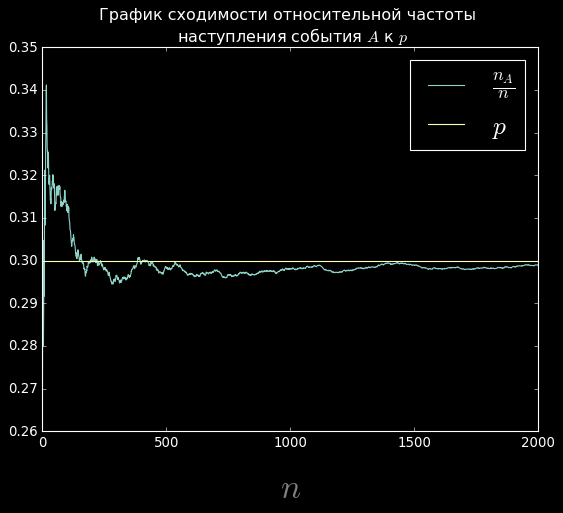

In [51]:
p = 0.3
rv = sts.bernoulli(p=p)
n = int(2e3)                             # n - независимых экспериментов
nn = list(range(1, n))
freqs = []                          # cписок относительных частот реализации события А в экспериментах
res = []                            
size = 30                           # объем выборки

for i in nn:
    freq = sum(rv.rvs(size))/size     # относительная частота реализации события А в одном эксперименте
    freqs.append(freq)      
    res.append(sum(freqs)/i)                  

plt.plot(nn, res, label=r'$\frac{n_A}{n}$')
plt.plot([1, n], [p, p], label=r'$p$')
plt.xlabel(r'$n$', fontsize=30, labelpad=20, color='grey')
plt.title('График сходимости относительной частоты \n наступления события $A$ к $p$')
plt.legend(prop={'size': 23})